In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

%matplotlib inline

# Preprocessing of  Data

In [2]:
train_path = "D:/ml ca4/Training"
test_path = "D:/ml ca4/Testing"

In [3]:
X_train = []
y_train = []
img_size = (300,300)

In [4]:
for folder in os.listdir(train_path):
    print(f"In folder: {folder}")
    for file in os.listdir(os.path.join(train_path,folder)):
        img_path = os.path.join(train_path,folder,file)
        img  = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        X_train.append(img)
        y_train.append(folder)

In folder: glioma_tumor
In folder: meningioma_tumor
In folder: no_tumor
In folder: pituitary_tumor


In [5]:
for folder in os.listdir(test_path):
    print(f"In folder: {folder}")
    for file in os.listdir(os.path.join(test_path,folder)):
        img_path = os.path.join(test_path,folder,file)
        img  = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        X_train.append(img)
        y_train.append(folder)

In folder: glioma_tumor
In folder: meningioma_tumor
In folder: no_tumor
In folder: pituitary_tumor


In [6]:
X_train = np.array(X_train, dtype='float32')

In [7]:
X_train = X_train / 255.0

# Visualization

C:\Users\visha\AppData\Local\Temp\ipykernel_7092\3862590299.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


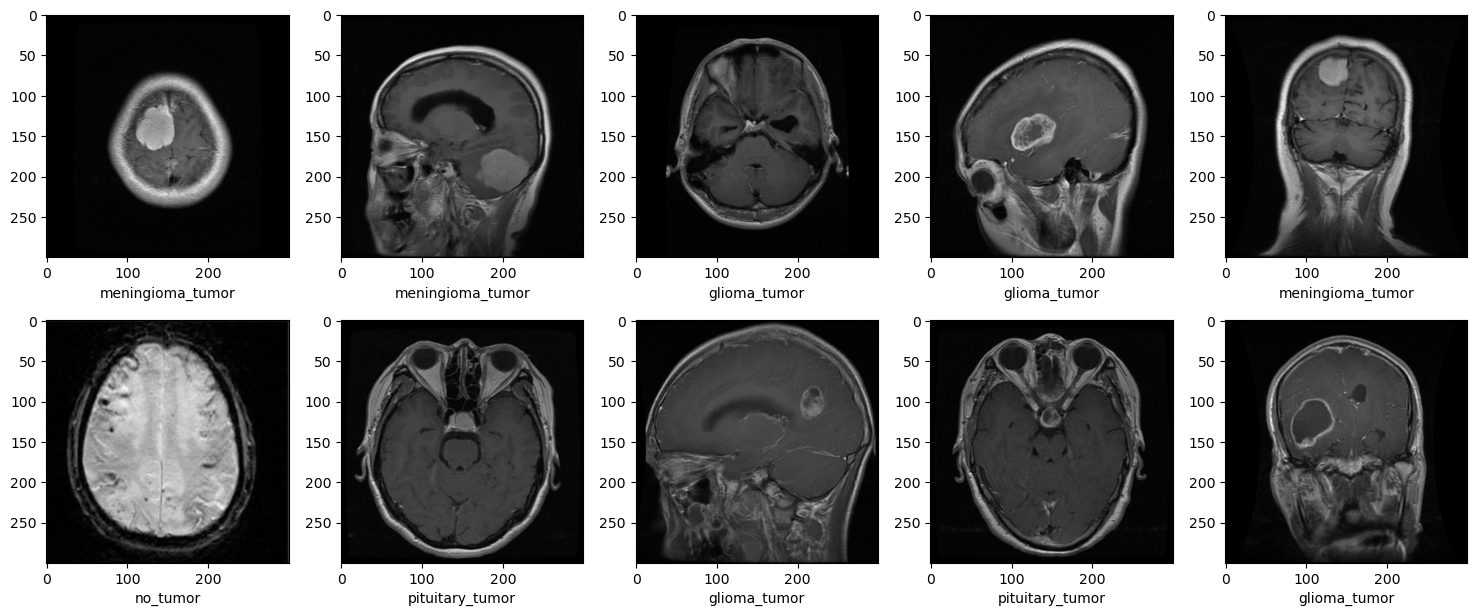

In [8]:
plt.figure(figsize=(15, 15))

random_indices = np.random.choice(len(X_train), size=10, replace=False) 
for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.xlabel(y_train[idx])
    plt.tight_layout()
plt.show()

# Data Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='nearest')

In [11]:
datagen.fit(X_train)

# Data Preparation

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
# One-Hot Encoding
y_train = np.array(pd.get_dummies(y_train))

In [14]:
#Splitting Data into training, testing and validation
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [15]:
print(f'X_train shape: {(X_train).shape}\n'
      f'y_train shape: {(y_train).shape}\n'
      f'X_test shape: {(X_test).shape}\n'
      f'y_test shape: {(y_test).shape}\n'
      f'X_valid shape: {(X_valid).shape}\n'
      f'y_valid shape: {(y_valid).shape}')

X_train shape: (2643, 300, 300, 3)
y_train shape: (2643, 4)
X_test shape: (327, 300, 300, 3)
y_test shape: (327, 4)
X_valid shape: (294, 300, 300, 3)
y_valid shape: (294, 4)


In [16]:
print(f"Maximum and Minimum pixel value after normalization: {X_train.max()} - {X_train.min()}")

Maximum and Minimum pixel value after normalization: 1.0 - 0.0


# Building CNN Model LENET-5

In [17]:
from tensorflow.keras import Sequential, activations
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dense, Resizing, BatchNormalization, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [18]:
input_shape = X_train.shape
print(input_shape)

(2643, 300, 300, 3)


In [19]:
height, width, _ = X_train.shape[1:]
print("Width:", width)
print("Height:", height)

Width: 300
Height: 300


In [20]:
# Create LeNet-5 model
lenet_model = Sequential([
    # Resizing layer
    Resizing(32, 32, interpolation='bilinear', input_shape=(width, height, 3)),
    
    # 1st Layer
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid', input_shape=(width, height, 3)),
    BatchNormalization(),
    # 2nd Layer
    AveragePooling2D(pool_size=(2, 2)),
    
    
    # 3rd Layer
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
      BatchNormalization(),
    # 4th Layer 
    AveragePooling2D(pool_size=(2, 2)),
  
    
    Flatten(),
    
    # 5th Layer
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(4, activation='softmax')
])

In [21]:
lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 6)         24        
 Normalization)                                                  
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 batch_normalization_1 (Bat  (None, 10, 10, 16)        6

In [22]:
# Compile the model
lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
history = lenet_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
42/42 [==============================] - 13s 261ms/step - loss: 0.9104 - accuracy: 0.6319 - val_loss: 1.3240 - val_accuracy: 0.3639
Epoch 2/20
42/42 [==============================] - 5s 109ms/step - loss: 0.5693 - accuracy: 0.7858 - val_loss: 1.2797 - val_accuracy: 0.3912
Epoch 3/20
42/42 [==============================] - 5s 108ms/step - loss: 0.4184 - accuracy: 0.8437 - val_loss: 1.2583 - val_accuracy: 0.3571
Epoch 4/20
42/42 [==============================] - 3s 82ms/step - loss: 0.3125 - accuracy: 0.8941 - val_loss: 1.5304 - val_accuracy: 0.3469
Epoch 5/20
42/42 [==============================] - 4s 89ms/step - loss: 0.2250 - accuracy: 0.9304 - val_loss: 1.4354 - val_accuracy: 0.4218
Epoch 6/20
42/42 [==============================] - 3s 67ms/step - loss: 0.1603 - accuracy: 0.9561 - val_loss: 1.8362 - val_accuracy: 0.3707
Epoch 7/20
42/42 [==============================] - 2s 55ms/step - loss: 0.1281 - accuracy: 0.9633 - val_loss: 1.6172 - val_accuracy: 0.4422
Epoch 8/2

In [24]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = lenet_model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy
print('Test Accuracy:', test_accuracy)

11/11 [==============================] - 0s 11ms/step - loss: 0.3558 - accuracy: 0.9174
Test Accuracy: 0.9174311757087708


In [25]:
from sklearn.metrics import recall_score

y_test_labels = np.argmax(y_test, axis=1)

# Make predictions on the test dataset
y_pred = lenet_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate recall score
recall = recall_score(y_test_labels, y_pred_classes, average='weighted')

# Print the recall score
print('Recall Score: ', recall)

11/11 [==============================] - 1s 9ms/step
Recall Score: 0.9174311926605505


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       117
           1       0.89      0.92      0.90        84
           2       0.91      0.85      0.88        48
           3       0.93      0.99      0.96        78

    accuracy                           0.92       327
   macro avg       0.92      0.91      0.91       327
weighted avg       0.92      0.92      0.92       327



In [27]:
class_names = []
for folder in os.listdir(train_path):
    class_names.append(folder)

class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

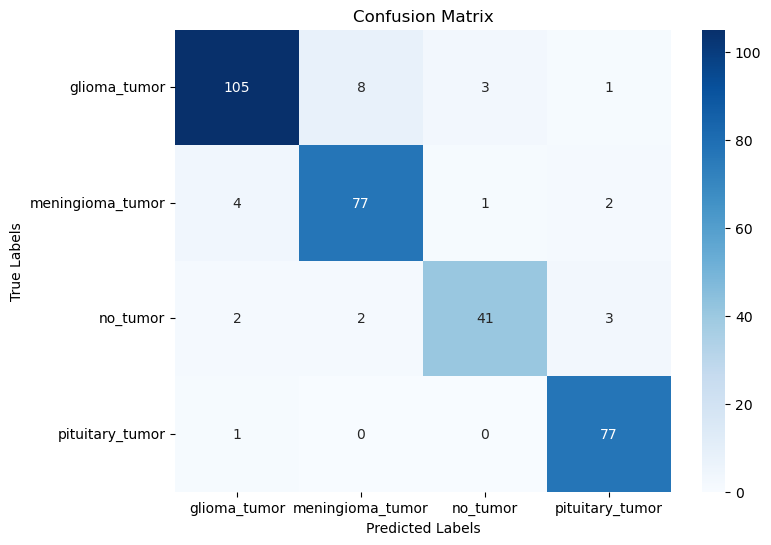

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# ALexNet

In [29]:
alexnet_model = Sequential([
            # Resizing
            Resizing(227,227, interpolation='bilinear', input_shape=(width,height,3)),
    
            #1st Convolutional Layer
            Conv2D(filters=96,kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
            
            #2nd Convolutional Layer
            Conv2D(filters=256,kernel_size=(5,5), strides=(1,1), padding='same', activation='relu' ),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
             
            #3rd Convolutional Layer
            Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
            BatchNormalization(),
                
            #4th Convolutional Layer
            Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
            BatchNormalization(),        
            
            #4th Convolutional Layer
            Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
            BatchNormalization(),
            MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                     
            Flatten(),
                     
            Dense(4096, activation='relu'),
            Dropout(0.5),
            
            Dense(4096, activation='relu'),
            Dropout(0.5),
                     
            Dense(4, activation='softmax')
])

In [30]:
alexnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 227, 227, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_2 (Bat  (None, 55, 55, 96)        384       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_3 (Bat  (None, 27, 27, 256)      

In [31]:
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = lenet_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
42/42 [==============================] - 6s 127ms/step - loss: 0.0165 - accuracy: 0.9962 - val_loss: 0.6215 - val_accuracy: 0.8401
Epoch 2/20
42/42 [==============================] - 2s 37ms/step - loss: 0.0414 - accuracy: 0.9898 - val_loss: 0.5372 - val_accuracy: 0.8469
Epoch 3/20
42/42 [==============================] - 1s 31ms/step - loss: 0.0194 - accuracy: 0.9958 - val_loss: 0.3863 - val_accuracy: 0.8946
Epoch 4/20
42/42 [==============================] - 1s 33ms/step - loss: 0.0501 - accuracy: 0.9841 - val_loss: 0.4126 - val_accuracy: 0.9048
Epoch 5/20
42/42 [==============================] - 1s 35ms/step - loss: 0.0339 - accuracy: 0.9883 - val_loss: 0.4960 - val_accuracy: 0.8571
Epoch 6/20
42/42 [==============================] - 2s 37ms/step - loss: 0.0149 - accuracy: 0.9966 - val_loss: 0.4936 - val_accuracy: 0.9082
Epoch 7/20
42/42 [==============================] - 2s 36ms/step - loss: 0.0072 - accuracy: 0.9989 - val_loss: 0.4625 - val_accuracy: 0.8810
Epoch 8/20
4

In [54]:
test_loss, test_accuracy_alex = lenet_model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy
print('Test Accuracy:', test_accuracy_alex)

11/11 [==============================] - 0s 16ms/step - loss: 0.3919 - accuracy: 0.9174
Test Accuracy: 0.9174311757087708


In [34]:
y_test_labels = np.argmax(y_test, axis=1)

# Make predictions on the test dataset
y_pred = lenet_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate recall score
recall = recall_score(y_test_labels, y_pred_classes, average='weighted')

# Print the recall score
print('Recall Score:', recall)

11/11 [==============================] - 0s 10ms/step
Recall Score: 0.9174311926605505


In [35]:
print(classification_report(y_test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       117
           1       0.90      0.92      0.91        84
           2       0.88      0.90      0.89        48
           3       0.93      0.96      0.94        78

    accuracy                           0.92       327
   macro avg       0.91      0.92      0.91       327
weighted avg       0.92      0.92      0.92       327



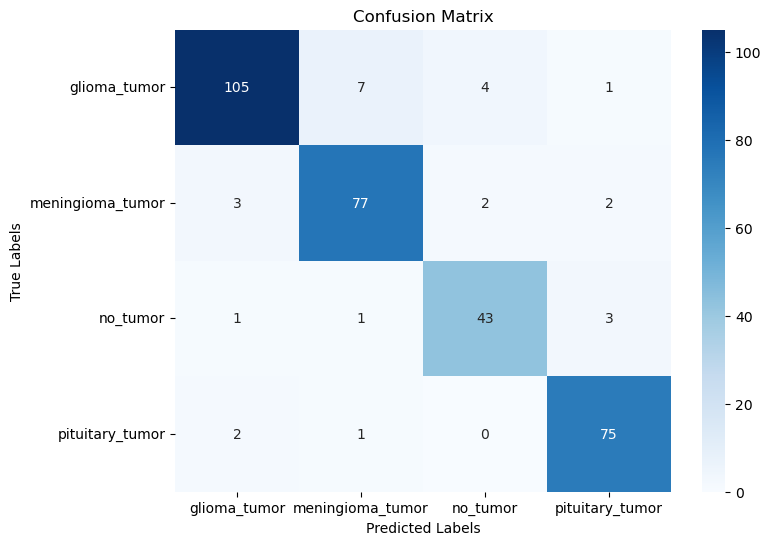

In [36]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [39]:
# Save the LeNet-5 model
lenet_model.save('lenet_model.h5')

# Save the AlexNet model
alexnet_model.save('alexnet_model.h5')


C:\Users\visha\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, Flatten, Dense
from tensorflow.keras.models import Model

In [42]:
def res_block(input_layer, filters, kernel_size=(3, 3), strides=(1, 1), activation='relu'):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Shortcut connection
    shortcut = input_layer
    if strides != (1, 1) or input_layer.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(input_layer)
        shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation(activation)(x)
    return x


In [47]:
def res_block(input_layer, filters, kernel_size=(3, 3), strides=(1, 1), activation='relu'):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    
    x = Conv2D(filters, kernel_size=kernel_size, strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    
    # Shortcut connection
    shortcut = input_layer
    if strides != (1, 1) or input_layer.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(input_layer)
        shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation(activation)(x)
    return x


In [48]:
# Define input shape and number of classes
input_shape_resnet = (width, height, 3)
num_classes_resnet = len(class_names)



In [49]:
# Create ResNet model
resnet_model = ResNet(input_shape_resnet, num_classes_resnet)

# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 conv2d_23 (Conv2D)          (None, 150, 150, 64)         9472      ['input_3[0][0]']             
                                                                                                  
 batch_normalization_23 (Ba  (None, 150, 150, 64)         256       ['conv2d_23[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_12 (Activation)  (None, 150, 150, 64)         0         ['batch_normalization_23[0

In [50]:
# Train the ResNet model
history_resnet = resnet_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=20,
    batch_size=64,
    verbose=1
)

# Evaluate the model on the test dataset
test_loss_resnet, test_accuracy_resnet = resnet_model.evaluate(X_test, y_test, verbose=1)

# Print the test accuracy
print('Test Accuracy (ResNet):', test_accuracy_resnet)


Epoch 1/20
42/42 [==============================] - 485s 11s/step - loss: 6.8902 - accuracy: 0.3424 - val_loss: 216.7403 - val_accuracy: 0.3469
Epoch 2/20
42/42 [==============================] - 559s 13s/step - loss: 1.3654 - accuracy: 0.4983 - val_loss: 17.1506 - val_accuracy: 0.4932
Epoch 3/20
42/42 [==============================] - 682s 16s/step - loss: 1.1893 - accuracy: 0.6110 - val_loss: 1.4040 - val_accuracy: 0.3265
Epoch 4/20
42/42 [==============================] - 641s 15s/step - loss: 0.8293 - accuracy: 0.6932 - val_loss: 1.1817 - val_accuracy: 0.5816
Epoch 5/20
42/42 [==============================] - 689s 16s/step - loss: 0.6537 - accuracy: 0.7382 - val_loss: 1.2503 - val_accuracy: 0.4286
Epoch 6/20
42/42 [==============================] - 725s 17s/step - loss: 0.5433 - accuracy: 0.7870 - val_loss: 1.2439 - val_accuracy: 0.4626
Epoch 7/20
42/42 [==============================] - 761s 18s/step - loss: 0.6340 - accuracy: 0.7911 - val_loss: 1.1536 - val_accuracy: 0.5204
Epo

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D,Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np

In [2]:
train_datasets = "D:/ml ca4/Training"
validation_datasets = "D:/ml ca4/Training"

In [3]:
batch_size = 640
image_size = 224
epochs = 20

In [4]:

def prepare_the_datasets(train_datasets, validation_datasets, batch_size, image_size):

    train_datasets_generator = ImageDataGenerator(rescale=1./255,
                                                  shear_range = 0.2,
                                                  zoom_range = 0.2,
                                                  horizontal_flip = True,
                                                  fill_mode = "nearest")


    validation_datasets_generator = ImageDataGenerator(rescale=1.0/255)


    train_datasets_generator_data = train_datasets_generator.flow_from_directory(
        batch_size = batch_size,
        directory = train_datasets,
        shuffle = True,
        target_size = (image_size, image_size),
        class_mode = "categorical"
    )

    validation_datasets_generator_data = validation_datasets_generator.flow_from_directory(
        batch_size = batch_size,
        directory = validation_datasets,
        shuffle = True,
        target_size = (image_size, image_size),
        class_mode = "categorical"
    )


    return train_datasets_generator_data, validation_datasets_generator_data


In [5]:
train_data , validation_data = prepare_the_datasets(train_datasets, validation_datasets, batch_size, image_size)

Found 2870 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (image_size, image_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(512, activation = "relu"),
    Dense(4, activation = "softmax")
])

In [7]:
model.compile(optimizer="adam",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"]
              )

In [8]:
model_checkpoint_filpath = "model_checkpoint.h5"
callbacks_checkpoints = ModelCheckpoint(

    filepath = model_checkpoint_filpath,
    save_weights_only = True,
    monitor = "val_accuracy",
    mode = "max",
    save_best_only = True
)

In [9]:
history = model.fit(train_data,
                    steps_per_epoch = len(train_data),
                    epochs = epochs,
                    validation_data = validation_data,
                    validation_steps = len(validation_data),
                    callbacks = [callbacks_checkpoints]
                    )

Epoch 1/20
5/5 [==============================] - 2408s 551s/step - loss: 2.8974 - accuracy: 0.3540 - val_loss: 1.3653 - val_accuracy: 0.4059
Epoch 2/20


KeyboardInterrupt: 

In [12]:
# Evaluate LeNet-5 model
test_loss_lenet, test_accuracy_lenet = lenet_model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy (LeNet-5):', test_accuracy_lenet)

# Evaluate AlexNet model
test_loss_alexnet, test_accuracy_alexnet = alexnet_model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy (AlexNet):', test_accuracy_alexnet)

# Evaluate ResNet model
test_loss_resnet, test_accuracy_resnet = resnet_model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy (ResNet):', test_accuracy_resnet)

# Compare accuracies and determine the best model
accuracies = {
    'LeNet-5': test_accuracy_lenet,
    'AlexNet': test_accuracy_alexnet,
    'ResNet': test_accuracy_resnet
}

best_model = max(accuracies, key=accuracies.get)
print('Best Model:', best_model)

# Save the best model
if best_model == 'LeNet-5':
    lenet_model.save('best_model.h5')
elif best_model == 'AlexNet':
    alexnet_model.save('best_model.h5')
else:
    resnet_model.save('best_model.h5')


NameError: name 'lenet_model' is not defined

In [10]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load the saved model
model = load_model('best_model.h5')

# Function to preprocess the image
def preprocess_image(image_path, img_size=(300, 300)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = np.array(img, dtype='float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Function to predict the tumor type
def predict_tumor(image_path, model):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    class_names = ['meningioma_tumor', 'glioma_tumor', 'no_tumor', 'pituitary_tumor']  # Replace with your class names
    return class_names[class_index]

# Example usage:
image_path = "D:/ml ca4/Testing/glioma_tumor/image(1).jpg"
predicted_class = predict_tumor(image_path, model)
print('Predicted Tumor Type:', predicted_class)


1/1 [==============================] - 0s 442ms/step
Predicted Tumor Type: glioma_tumor
